In [1]:
"""
This script unpacks the 4-dimensional data from the ROOT file to a pickled pandas dataframe

See (eventually) process_ROOT_27D for the 27-dimensional equivalent. 
"""

import pandas as pd
import uproot
import numpy as np
from sklearn.model_selection import train_test_split

ROOTFilePath = 'data/DAOD_TRIG6.16825104._000230.pool.root.1'

processed_folder = 'processed_data/'

auto_filename = True
#Unused if auto_filename = True
train_filename = 'all_jets_train.pkl'
test_filename = 'all_jets_test.pkl'

#Fraction of data to be saved
data_frac = 0.2

tree = uproot.open(ROOTFilePath)['CollectionTree']

#Specifies the dataset. The available 'columns' can be read with ttree.keys()
branchnames = ['HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.m',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.pt',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.phi',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.eta']

df_dict = {}
for pp, branchname in enumerate(branchnames):
    print("Reading: " + branchname)
    if 'EnergyPerSampling' in branchname:
        pass
    else:
        variable = branchname.split('.')[1]
        df_dict[variable] = []
        jaggedX = tree.array(branchname)
        for ii, arr in enumerate(jaggedX):
            for kk, val in enumerate(arr):
                df_dict[variable].append(val)

print('100%')
print('Creating DataFrame...')
df = pd.DataFrame(data=df_dict)
print('Head of data:')
print(df.head())

train, test = train_test_split(df, test_size=0.2, random_state=41)

if auto_filename:
    train_filename = "all_jets_train_4D_" + str(int(data_frac*100))+"_percent.pkl"
    test_filename = "all_jets_test_4D_" + str(int(data_frac*100)) +"_percent.pkl"  
    
partial_train_percent = train.sample(frac=data_frac, random_state=42).reset_index(drop=True)  # Pick out a fraction of the data
partial_test_percent = test.sample(frac=data_frac, random_state=42).reset_index(drop=True)

print("Train data shape: " + str(train.shape))
print("Test data shape: " + str(test.shape))
      
# Save train and test sets
print('Saving ' + processed_folder + train_filename)
train.to_pickle(processed_folder + train_filename)
print("Saving " + processed_folder + test_filename)
test.to_pickle(processed_folder + test_filename)

Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.m
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.pt
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.phi
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.eta
100%
Creating DataFrame...
Head of data:
              m            pt       phi       eta
0   8298.433594  90167.523438  1.535709  0.945709
1   9528.240234  49597.640625 -1.153903  0.879157
2  10391.410156  43733.449219  3.029290  0.569601
3   5586.961914  27521.517578 -2.165133  1.524836
4   4330.094238  23390.876953  0.255397  1.013532
Train data shape: (8668820, 4)
Test data shape: (2167206, 4)
Saving processed_data/all_jets_train_4D_20_percent.pkl
Saving processed_data/all_jets_test_4D_20_percent.pkl


[[ 4.89360205e+03  4.15344453e+04  2.76709223e+00  1.09345496e+00]
 [ 3.05413306e+03  2.25001719e+04 -1.83267176e+00  1.36686826e+00]
 [ 3.20263257e+03  2.38957656e+04  1.28327668e+00 -9.19975042e-01]
 ...
 [ 4.40205127e+03  2.20123359e+04 -8.28810155e-01  9.14539278e-01]
 [ 4.28214355e+03  2.09685566e+04 -4.27042931e-01 -1.75606775e+00]
 [ 1.30214307e+04  9.61886641e+04 -6.63359344e-01  1.64201713e+00]]


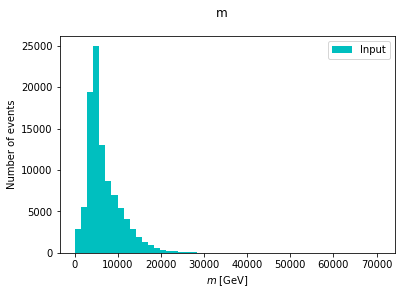

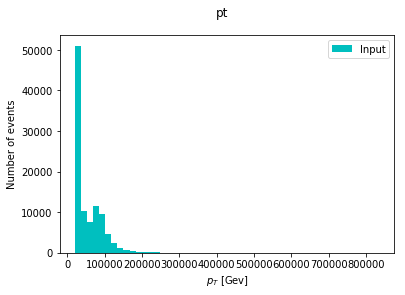

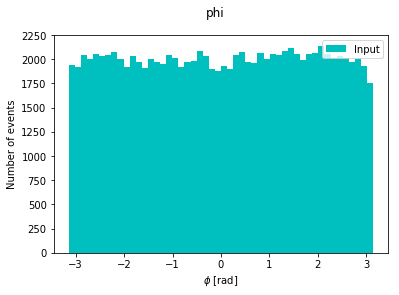

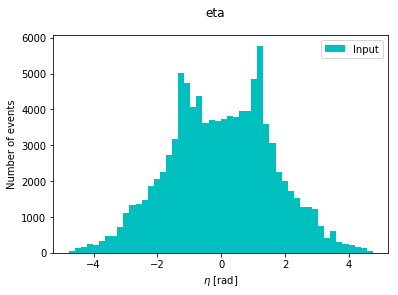

In [3]:
import matplotlib.pyplot as plt
import torch

plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = test[idxs[0]:idxs[1]].values

print(data)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    plt.suptitle(test.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    # plt.yscale('log')
    plt.legend()
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)